In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train,X_test=X_train/255,X_test/255

In [ ]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(X[index])
  plt.xlabel(Y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


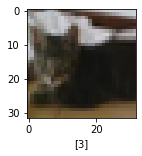

In [ ]:
plot_sample(X_train,Y_train,9)

In [ ]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5186 - accuracy: 0.4476 - val_loss: 1.2892 - val_accuracy: 0.5316
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1493 - accuracy: 0.5944 - val_loss: 1.0788 - val_accuracy: 0.6267
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9936 - accuracy: 0.6524 - val_loss: 0.9560 - val_accuracy: 0.6680
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9008 - accuracy: 0.6864 - val_loss: 0.9169 - val_accuracy: 0.6847
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8289 - accuracy: 0.7109 - val_loss: 0.9248 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7726 - accuracy: 0.7294 - val_loss: 0.8463 - val_accuracy: 0.7127
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7196 - accuracy: 0.7482 - val_loss: 0.9149 -

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.8454 - accuracy: 0.7203


[0.8453841805458069, 0.720300018787384]

In [ ]:
Y_test=Y_test.reshape(-1,)
Y_predict=model.predict(X_test)

In [ ]:
Y_classes=[np.argmax(element) for element in Y_predict]
print("classification report:\n",classification_report(Y_test,Y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.88      0.83      0.85      1000
           2       0.54      0.66      0.59      1000
           3       0.55      0.53      0.54      1000
           4       0.68      0.68      0.68      1000
           5       0.67      0.56      0.61      1000
           6       0.80      0.78      0.79      1000
           7       0.74      0.77      0.76      1000
           8       0.83      0.82      0.82      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



313/313 - 4s - loss: 0.8454 - accuracy: 0.7203 - 4s/epoch - 14ms/step


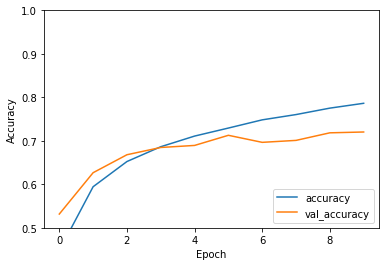

In [ ]:
#extra
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(X_test,Y_test,verbose=2)

In [ ]:
print(test_acc)

0.720300018787384
